## Kaggle Whale

Humpback Whale Identification - CNN with Keras¶
This kernel is based on Anezka Kolaceke's awesome work: CNN with Keras for Humpback Whale ID

Keras CNN starter

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import matplotlib.image as mplimg
from matplotlib.pyplot import imshow

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from keras import layers
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Model

import keras.backend as K
from keras.models import Sequential

import warnings
warnings.simplefilter("ignore", category=DeprecationWarning)

Using TensorFlow backend.


In [2]:
import tensorflow as tf
print(tf.__version__)

1.12.0


In [3]:
os.listdir("./input/")

['sample_submission.csv', 'test', 'train', 'train.csv']

In [4]:
train_df = pd.read_csv("./input/train.csv")
train_df.head()

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale


In [5]:
def prepareImages(data, m, dataset):
    print("Preparing images")
    X_train = np.zeros((m, 100, 100, 3))
    count = 0
    
    for fig in data['Image']:
        #load images into images of size 100x100x3
        img = image.load_img("./input/"+dataset+"/"+fig, target_size=(100, 100, 3))
        x = image.img_to_array(img)
        x = preprocess_input(x)

        X_train[count] = x
        if (count%500 == 0):
            print("Processing image: ", count+1, ", ", fig)
        count += 1
    
    return X_train

In [6]:
def prepare_labels(y):
    values = np.array(y)
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    # print(integer_encoded)

    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    # print(onehot_encoded)

    y = onehot_encoded
    # print(y.shape)
    return y, label_encoder

In [7]:
X = prepareImages(train_df, train_df.shape[0], "train")
X /= 255

Preparing images
Processing image:  1 ,  0000e88ab.jpg
Processing image:  501 ,  04c72257b.jpg
Processing image:  1001 ,  09cacb84d.jpg
Processing image:  1501 ,  0ef961892.jpg
Processing image:  2001 ,  141b56a1a.jpg
Processing image:  2501 ,  199a417aa.jpg
Processing image:  3001 ,  1ec170983.jpg
Processing image:  3501 ,  23f084b93.jpg
Processing image:  4001 ,  29163ad0b.jpg
Processing image:  4501 ,  2e0fab120.jpg
Processing image:  5001 ,  3347515d9.jpg
Processing image:  5501 ,  3842d71dc.jpg
Processing image:  6001 ,  3d7f4c7d5.jpg
Processing image:  6501 ,  425f763ca.jpg
Processing image:  7001 ,  4714400cd.jpg
Processing image:  7501 ,  4c082fbdf.jpg
Processing image:  8001 ,  50c683e23.jpg
Processing image:  8501 ,  560d986ad.jpg
Processing image:  9001 ,  5b68c83ed.jpg
Processing image:  9501 ,  60410f111.jpg
Processing image:  10001 ,  654951f81.jpg
Processing image:  10501 ,  6a572256c.jpg
Processing image:  11001 ,  6f96f55b6.jpg
Processing image:  11501 ,  74da2b511.jpg

In [8]:
y, label_encoder = prepare_labels(train_df['Id'])

In [9]:
y.shape

(25361, 5005)

In [10]:
#from keras.optimizers import adam
#from keras.applications import MobileNet

#model = MobileNet(input_shape=(100, 100, 3), alpha=1., weights=None, classes=5005)

#model.compile(optimizer=adam(lr=0.0005),loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:
def top_5_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=5)

In [12]:
from keras.optimizers import adam
from keras.applications import MobileNet
from keras.metrics import categorical_accuracy, top_k_categorical_accuracy, categorical_crossentropy

model = MobileNet(input_shape=(100, 100, 3), alpha=1., weights=None, classes=5005)

model.compile(optimizer=adam(lr=0.001), loss='categorical_crossentropy',
              metrics=[categorical_crossentropy, categorical_accuracy, top_5_accuracy])

In [13]:
#from keras.optimizers import adam

#model = Sequential()

#model.add(Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0', input_shape = (100, 100, 3)))

#model.add(BatchNormalization(axis = 3, name = 'bn0'))
#model.add(Activation('relu'))

#model.add(MaxPooling2D((2, 2), name='max_pool'))
#model.add(Conv2D(64, (3, 3), strides = (1,1), name="conv1"))
#model.add(Activation('relu'))
#model.add(AveragePooling2D((3, 3), name='avg_pool'))

#model.add(Flatten())
#model.add(Dense(500, activation="relu", name='rl'))
#model.add(Dropout(0.8))

#model.add(Dense(y.shape[1], activation='softmax', name='sm'))

#model.compile(optimizer=adam(lr=0.001),loss='categorical_crossentropy', metrics=['accuracy'])



In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 101, 101, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 50, 50, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 50, 50, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 50, 50, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 50, 50, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 50, 50, 32)        128       
__________

In [15]:
import gc
history = model.fit(X, y, epochs=100, batch_size=256, verbose=1)
gc.collect()

Epoch 1/100
25361/25361 [==============================] - 4442s 175ms/step - loss: 6.1841 - categorical_crossentropy: 6.1841 - categorical_accuracy: 0.3624 - top_5_accuracy: 0.3745
Epoch 2/100
25361/25361 [==============================] - 4452s 176ms/step - loss: 5.6414 - categorical_crossentropy: 5.6414 - categorical_accuracy: 0.3811 - top_5_accuracy: 0.3937
Epoch 3/100
25361/25361 [==============================] - 4435s 175ms/step - loss: 5.4511 - categorical_crossentropy: 5.4511 - categorical_accuracy: 0.3811 - top_5_accuracy: 0.3969
Epoch 4/100
25361/25361 [==============================] - 4430s 175ms/step - loss: 5.2700 - categorical_crossentropy: 5.2700 - categorical_accuracy: 0.3811 - top_5_accuracy: 0.3998
Epoch 5/100
25361/25361 [==============================] - 4485s 177ms/step - loss: 5.0617 - categorical_crossentropy: 5.0617 - categorical_accuracy: 0.3811 - top_5_accuracy: 0.4055
Epoch 6/100
25361/25361 [==============================] - 4579s 181ms/step - loss: 4.8471

25361/25361 [==============================] - 4568s 180ms/step - loss: 0.1905 - categorical_crossentropy: 0.1905 - categorical_accuracy: 0.9466 - top_5_accuracy: 0.9965
Epoch 46/100
25361/25361 [==============================] - 4601s 181ms/step - loss: 0.1010 - categorical_crossentropy: 0.1010 - categorical_accuracy: 0.9736 - top_5_accuracy: 0.9983
Epoch 47/100
25361/25361 [==============================] - 4575s 180ms/step - loss: 0.1503 - categorical_crossentropy: 0.1503 - categorical_accuracy: 0.9574 - top_5_accuracy: 0.9976
Epoch 48/100
25361/25361 [==============================] - 4607s 182ms/step - loss: 0.1754 - categorical_crossentropy: 0.1754 - categorical_accuracy: 0.9506 - top_5_accuracy: 0.9966
Epoch 49/100
25361/25361 [==============================] - 4592s 181ms/step - loss: 0.1189 - categorical_crossentropy: 0.1189 - categorical_accuracy: 0.9666 - top_5_accuracy: 0.9984
Epoch 50/100
25361/25361 [==============================] - 4666s 184ms/step - loss: 0.0600 - cate

25361/25361 [==============================] - 4566s 180ms/step - loss: 0.0819 - categorical_crossentropy: 0.0819 - categorical_accuracy: 0.9787 - top_5_accuracy: 0.9981
Epoch 90/100
25361/25361 [==============================] - 4586s 181ms/step - loss: 0.0705 - categorical_crossentropy: 0.0705 - categorical_accuracy: 0.9805 - top_5_accuracy: 0.9987
Epoch 91/100
25361/25361 [==============================] - 4571s 180ms/step - loss: 0.1182 - categorical_crossentropy: 0.1182 - categorical_accuracy: 0.9684 - top_5_accuracy: 0.9974
Epoch 92/100
25361/25361 [==============================] - 4585s 181ms/step - loss: 0.0617 - categorical_crossentropy: 0.0617 - categorical_accuracy: 0.9832 - top_5_accuracy: 0.9991
Epoch 93/100
25361/25361 [==============================] - 4590s 181ms/step - loss: 0.0306 - categorical_crossentropy: 0.0306 - categorical_accuracy: 0.9929 - top_5_accuracy: 0.9993
Epoch 94/100
25361/25361 [==============================] - 4574s 180ms/step - loss: 0.0125 - cate

150

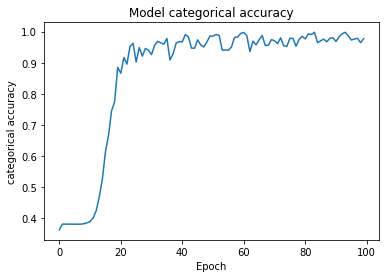

In [16]:
plt.plot(history.history['categorical_accuracy'])
plt.title('Model categorical accuracy')
plt.ylabel('categorical accuracy')
plt.xlabel('Epoch')
plt.show()

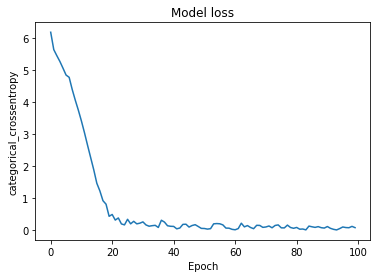

In [17]:
plt.plot(history.history['categorical_crossentropy'])
plt.title('Model loss')
plt.ylabel('categorical_crossentropy')
plt.xlabel('Epoch')
plt.show()

In [18]:
test = os.listdir("./input/test/")
print(len(test))

7960


In [19]:
col = ['Image']
test_df = pd.DataFrame(test, columns=col)
test_df['Id'] = ''

In [20]:
X = prepareImages(test_df, test_df.shape[0], "test")
X /= 255

Preparing images
Processing image:  1 ,  00028a005.jpg
Processing image:  501 ,  0f9219c40.jpg
Processing image:  1001 ,  1ea95c247.jpg
Processing image:  1501 ,  2fe4ec2d5.jpg
Processing image:  2001 ,  404206f77.jpg
Processing image:  2501 ,  4fc69fd82.jpg
Processing image:  3001 ,  5ffc2d300.jpg
Processing image:  3501 ,  7042be267.jpg
Processing image:  4001 ,  801c6a722.jpg
Processing image:  4501 ,  906aa36c8.jpg
Processing image:  5001 ,  a0d337cdc.jpg
Processing image:  5501 ,  b1a4e4c18.jpg
Processing image:  6001 ,  c0b378682.jpg
Processing image:  6501 ,  cfe9d9d04.jpg
Processing image:  7001 ,  e00620fc3.jpg
Processing image:  7501 ,  f1b504951.jpg


In [21]:
predictions = model.predict(np.array(X), verbose=1)

7960/7960 [==============================] - 270s 34ms/step


In [22]:
for i, pred in enumerate(predictions):
    test_df.loc[i, 'Id'] = ' '.join(label_encoder.inverse_transform(pred.argsort()[-5:][::-1]))

In [23]:
test_df.head(10)
test_df.to_csv('submission_8.csv', index=False)